# Linear Regression on Iris dataset
### by maryam babaei

### ۱.اضافه کردن کتابخانه های مورد نیاز برای محاسبات ماتریسی و رسم نمودار ها

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt

### ۲.خواندن داده ها با کمک کتابخانه پانداس  

In [2]:
my_data = pd.read_csv('iris.csv') 

### ۳.نمایش پنج ردیف اول از دیتا 

In [3]:
my_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### ۴. رسم نمودار pairplot برای مشاهده ی رابطه ی ستون ها با هم 


### نمودار های روی قطر اصلی نشان دهنده توزیع آن داده است که برای هر گونه با رنگ متفاوت رسم شده است

<Figure size 3200x1200 with 0 Axes>

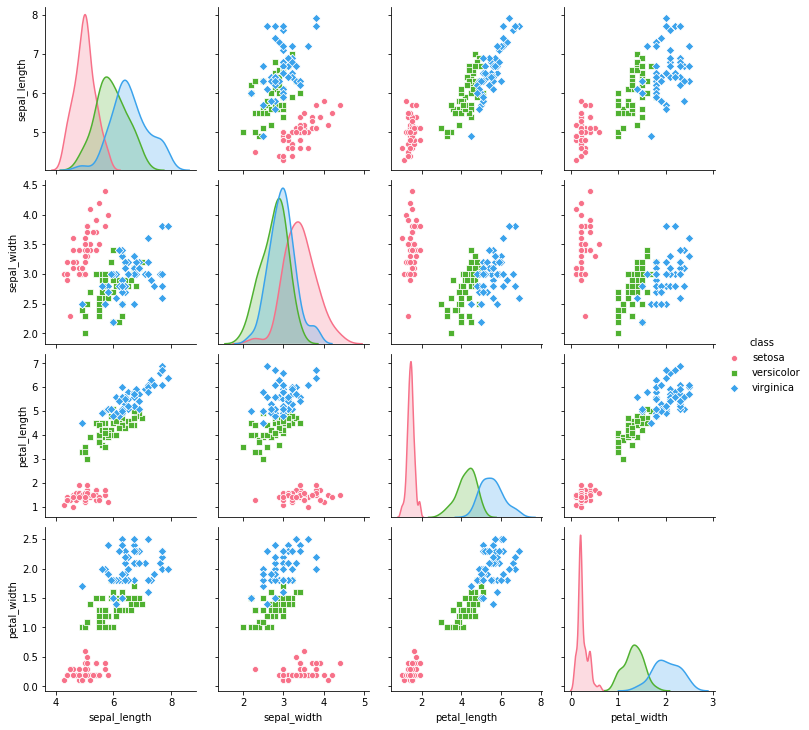

In [4]:
plt.figure(figsize = (16,6),dpi = 200)
sns.pairplot(my_data,hue="class",palette="husl", markers=["o", "s", "D"])
plt.show()

### ۵. حال برای بررسی وابستگی داده ها میتوانیم از نمودار حرارتی کمک بگیریم

### در این نمودار هرچه رنگ به کرمی کمرنگ نزدیک تر باشد نشان دهنده ی رابطه ی مستقیم آن دو ستون و هرچه رنگ به بادمجانی نزدیک باشد رابطه ی عکس دو ستون را نشان می دهد.

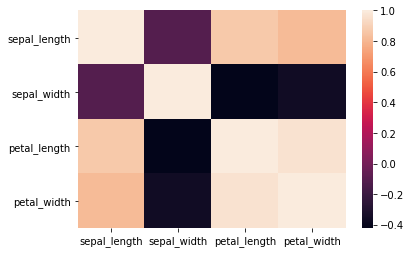

In [5]:
sns.heatmap(my_data.corr())

### ۶. حال نمودار طول کاسبرگ بر حسب عرض گلبرگ را به طور مجزا رسم می کنیم.

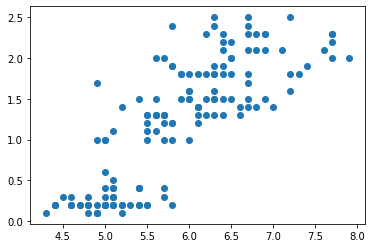

In [6]:
x=my_data.iloc[:,0:1]
y=my_data.iloc[:,3:4]
plt.scatter(x, y)
axes = plt.gca()


### ۷.   ستون گونه هارا حذف و باقی داده ها را نرمال سازی میکنیم تا به صورت یک توزیع نرمال استاندارد در بیایند. 

In [7]:
my_data= my_data.drop(columns = ['class'])
my_data= (my_data - my_data.mean())/my_data.std()
my_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


### ۸. نمایش نمودار توزیع بعد از نرمال سازی داده ها

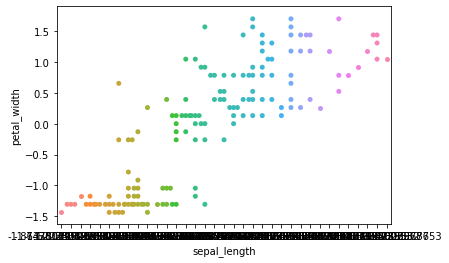

In [8]:
sns.swarmplot(x='sepal_length',y='petal_width',data=my_data)

### ۹. تعریف توابع محاسبه میانگین، محاسبه واریانس و محاسبه ی کواریانس 

In [10]:
def calmean(x):
    x_total=0
    for i in range(0,len(x)):
        x_total+=x[i]
    number_of_x = len(x)
    mean = x_total / float(number_of_x)
    return mean
 

In [11]:
def calvariance(x):
    x_mean = calmean(x)
    mean_difference_squared_x = [pow((x1 - x_mean), 2) for x1 in x]
    variance = sum(mean_difference_squared_x)
    return variance / float(len(x) - 1)
 
 

In [12]:
def calcovariance(x, y):

    x_mean = calmean(x)
    y_mean = calmean(y)
    xy_size = len(x)
    covariance = 0.0
    for i in range(0, xy_size):
        covariance += (x[i] - x_mean) * (y[i] - y_mean)
    return covariance / float(xy_size - 1)


### ۱۰. ساخت تابع محاسبه yhat 
### این تابع بر اساس فرمول محاسبه ی بتا یک و بتا صفر در رگرسیون خطی ساده نوشته شده است

In [13]:
def linear_regression(x,y):
    x_mean = calmean(x)
    y_mean = calmean(y)
 
    x_variance = calvariance(x)
    y_variance = calvariance(y)
    w0=0
    w1=0
    covariance_of_x_and_y = calcovariance(x, y)

    w1 = covariance_of_x_and_y / float(x_variance)
 
    w0 = y_mean - (w1 * x_mean)
    yhat=[]
    for i in range(0,len(X)):
        yhat.append(w0 + w1 * x[i])
    return yhat

### ۱۱. فراخوانی تابع و نمایش مقادیر تخمین زده شده

In [14]:
X=my_data['sepal_length']
x=[]
y=[]
for i in range(0,len(X)):
    x.append(X[i])
Y=my_data['petal_width']
for i in range(0,len(Y)):
    y.append(Y[i])
g = linear_regression(x,y)
print('Y^ is: \n',g)

#finalCost = computeCost(X,y,g)
#print('finalCost is:',finalCost)

Y^ is: 
 [-0.734255611069585, -0.9318131745860645, -1.1293707381025448, -1.2281495198607855, -0.8330343928278249, -0.4379192657948642, -1.2281495198607855, -0.8330343928278249, -1.425707083377265, -0.9318131745860645, -0.4379192657948642, -1.0305919563443053, -1.0305919563443053, -1.5244858651355055, -0.04280413876190437, -0.14158292052014412, -0.4379192657948642, -0.734255611069585, -0.14158292052014412, -0.734255611069585, -0.4379192657948642, -0.734255611069585, -1.2281495198607855, -0.734255611069585, -1.0305919563443053, -0.8330343928278249, -0.8330343928278249, -0.6354768293113445, -0.6354768293113445, -1.1293707381025448, -1.0305919563443053, -0.4379192657948642, -0.6354768293113445, -0.33914048403662445, -0.9318131745860645, -0.8330343928278249, -0.33914048403662445, -0.9318131745860645, -1.425707083377265, -0.734255611069585, -0.8330343928278249, -1.3269283016190254, -1.425707083377265, -0.8330343928278249, -0.734255611069585, -1.0305919563443053, -0.734255611069585, -1.228149

### ۱۲. رسم خط تخمین زده شده روی دیتا ها

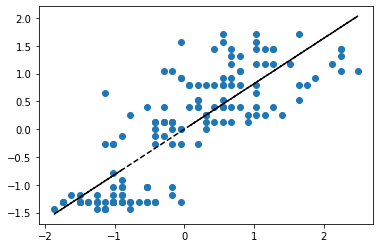

In [15]:
plt.scatter(X, Y)
axes = plt.gca()
x_vals = x
y_vals = g
plt.plot(x_vals, y_vals, '--', color ='k')

### ۱۳. رسم خط با استفاده از کتابخانه برای مقایسه نتایج

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

X = np.array(my_data['sepal_length']).reshape(-1, 1) 
y = np.array(my_data['petal_width']).reshape(-1, 1) 
my_data.dropna(inplace = True) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
regr = LinearRegression() 

regr.fit(X_train, y_train) 
print('coefficient of determination R^2 is:',regr.score(X_test, y_test)) 

coefficient of determination R^2 is: 0.6172360739218605


### ۱۴. رسم نودار آن که نشان می دهد خط تخمین زده ما مشابه آن است

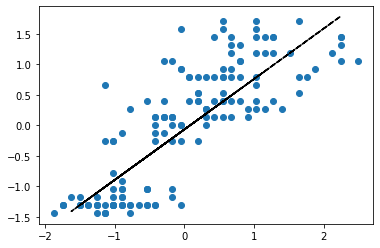

In [17]:
y_pred = regr.predict(X_test) 
plt.scatter(X, y) 
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
plt.plot(X_test, y_pred,'--', color ='k') 
plt.show() 